In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.core.interactiveshell import InteractiveShell
#让所有的变量或者声明都能显示出来
InteractiveShell.ast_node_interactivity = 'all'

# IMDB 数据集——二分类

本节使用IMDB数据集，它包含来自互联网电影数据库（IMDB）的50000条严重两极分化的评论。数据集被分为用于训练的25000条评论与用于测试的25000条评论，训练集和测试集都包含50%的正面评论和50%的负面评论。

与 MNIST 数据集一样，IMDB 数据集也内置于 Keras 库。它已经过预处理：评论（单词序列）已经被转换为整数序列，**其中每个整数代表字典中的某个单词**。

 0代表负面（negative）， 1 代表正面（positive）


In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)#仅保留训练数据中前10000个最常出现的单词。低频单词将被舍弃
train_data.shape
train_labels.shape
train_data
train_data[0]

(25000,)

(25000,)

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

由于限定为前 10 000 个最常见的单词，单词索引都不会超过 10 000。

In [3]:
max([max(sequence) for sequence in train_data])

9999

你可以将某条评论迅速解码为英文单词

In [3]:
word_index = imdb.get_word_index()#word_index 是一个将单词映射为整数索引的字典
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [4]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()]) # 键值颠倒，将整数索引映射为单词
reverse_word_index
#将评论解码。注意，索引减去了 3，因为 0、 1、 2是为“padding”（填充）、“start of sequence”（序列开始）、“unknown”（未知词）分别保留的索引
decoded_review = ''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

将列表转换为张量

* 填充列表，使其具有相同的长度，再将列表转换成形状为 (samples, word_indices)的整数张量，然后网络第一层使用能处理这种整数张量的层（即 Embedding 层，本书后面会详细介绍）

* 对列表进行 one-hot 编码，将其转换为 0 和 1 组成的向量。举个例子，序列 [3, 5] 将会被转换为 10 000 维向量，只有索引为 3 和 5 的元素是 1，其余元素都是 0。然后网络第一层可以用 Dense 层，它能够处理浮点数向量数据。

In [5]:
def vectorize_sequences(sequences, dim=10000):
    results = np.zeros((len(sequences),dim))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results
X_trainval = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_trainval = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
X_trainval.shape
X_trainval[0]

(25000, 10000)

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
X_val = X_trainval[:10000]
X_train = X_trainval[10000:]

y_val = y_trainval[:10000]
y_train = y_trainval[10000:]

## 定义model网络结构

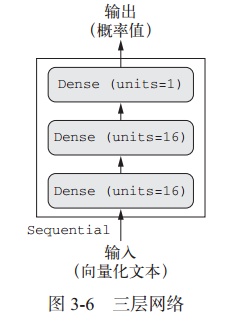

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = tf.keras.models.Sequential()
model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=16, activation='relu',))
model.add(layers.Dense(units=1, activation='sigmoid',))

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
filepath = './model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.hdf5'
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='my_log_dir',histogram_freq=1,embeddings_freq=1,),
             tf.keras.callbacks.ModelCheckpoint(filepath=filepath,monitor='val_loss',save_best_only=True,),]
history = model.fit(X_train,y_train,
                    epochs=20,batch_size=512,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 129us/sample - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.7439 - val_accuracy: 0.8620
Epoch 2/20
15000/15000 [==============================] - 2s 146us/sample - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.7682 - val_accuracy: 0.8627
Epoch 3/20
15000/15000 [==============================] - 3s 180us/sample - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.8053 - val_accuracy: 0.8624
Epoch 4/20
15000/15000 [==============================] - 3s 201us/sample - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.8670 - val_accuracy: 0.8568
Epoch 5/20
15000/15000 [==============================] - 3s 179us/sample - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.8651 - val_accuracy: 0.8618
Epoch 6/20
15000/15000 [==============================] - 3s 178us/sample - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.9673 - val_accuracy: 0.8523
Epoch 7/20
15000/15000 [==========================

KeyError: 'val_loss'

## 观察结果

In [26]:
history.history

{'loss': [0.5111873335997263,
  0.3062887589295705,
  0.2230892123301824,
  0.17703381764888765,
  0.1441416974067688,
  0.11662797517379125,
  0.10027363042036692,
  0.07943113236228624,
  0.06755653437972069,
  0.05269278481801351,
  0.04342469149430593,
  0.031327482573191325,
  0.027766503682732584,
  0.021968169870972633,
  0.015608847965300083,
  0.012957794154683748,
  0.010969182604551314,
  0.0055980535199244815,
  0.00570486406882604,
  0.0050911461194356284],
 'accuracy': [0.79073334,
  0.90106666,
  0.9308,
  0.9448,
  0.95346665,
  0.96493334,
  0.9686,
  0.9778,
  0.9814,
  0.9870667,
  0.99,
  0.9939333,
  0.9952,
  0.99586666,
  0.99826664,
  0.99866664,
  0.99806666,
  0.9997333,
  0.99946666,
  0.9992667],
 'val_loss': [0.40276896729469297,
  0.3122299372196197,
  0.288218753528595,
  0.2728157606601715,
  0.2808524402141571,
  0.3336259881019592,
  0.3285217176914215,
  0.33032395210266113,
  0.35435567507743837,
  0.4025786434173584,
  0.4142768620967865,
  0.441383

### 绘制训练损失和验证损失

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

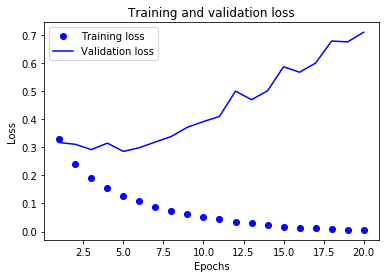

In [12]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 绘制训练精度和验证精度

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

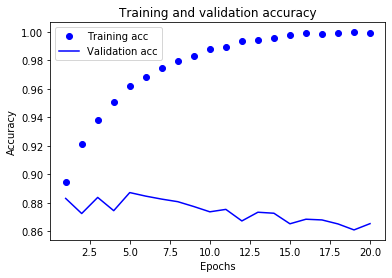

In [13]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()